In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
np.random.seed(42)
# Set seaborn style for professional appearance
sns.set_style("white")
sns.set_context("notebook", font_scale=1.2)


In [35]:
# Sampling from a multinomial distribution
# Example: rolling a weighted die

# Define probabilities for each outcome
# n = 5
probabilities = [0.1, 0.2, 0.3, 0.25, 0.15]  # Must sum to 1.0

# Sample from the multinomial distribution
# np.random.multinomial(n, pvals) draws n samples
# Returns counts for each category
n_trials = 10
counts = np.random.multinomial(n_trials, probabilities)
print(f"Counts for {n_trials} trials: {counts}")

# To sample individual outcomes (categorical distribution)
# Use np.random.choice with probabilities
n_samples = 1000
samples = np.random.choice(len(probabilities), size=n_samples, p=probabilities)
print(f"\nFirst 20 samples: {samples[:20]}")

# Verify the empirical distribution matches the probabilities
unique, counts = np.unique(samples, return_counts=True)
print(f"True probabilities: {probabilities}")

# To sample from a Gaussian with mean mu and variance v:
# x = mu + sqrt(v) * np.random.randn()
# Or equivalently: x = np.random.normal(mu, sqrt(v))

TAU = 3.0
std = TAU
sample = std * np.random.randn()


Counts for 10 trials: [2 0 4 3 1]

First 20 samples: [1 0 3 2 3 0 2 2 3 2 3 4 3 1 0 4 0 4 2 4]
True probabilities: [0.1, 0.2, 0.3, 0.25, 0.15]


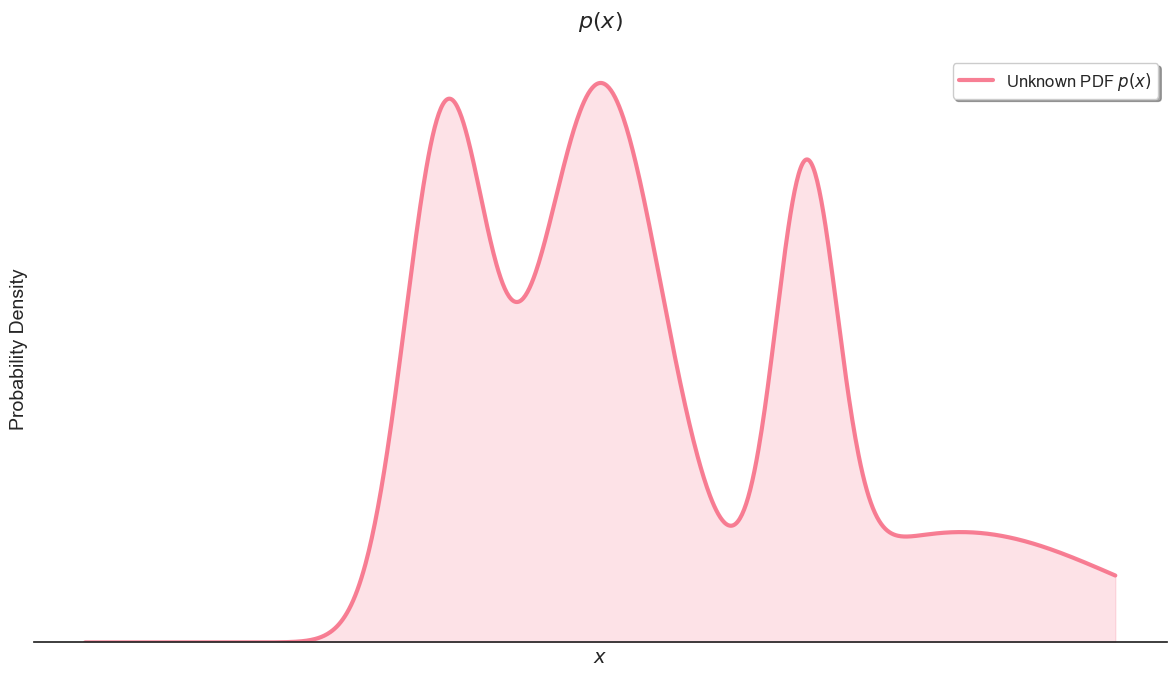

In [ ]:
# Create a mixture of Gaussians distribution

# Define mixture parameters
means = [-3, 0, 4, 7, ]
stds = [0.8, 1.2, 0.6, 3.0]
weights = [0.25, 0.4, 0.15, 0.2]


# Create the plot with seaborn styling
fig, ax = plt.subplots(figsize=(12, 7))

# Plot the theoretical PDF (probability distribution)
x = np.linspace(-10, 10, 1000)
pdf = sum(w * (1 / (std * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mean) / std) ** 2) 
          for w, mean, std in zip(weights, means, stds))

# Use a sophisticated color palette
color = sns.color_palette("husl", 1)[0]
ax.plot(x, pdf, linewidth=3, label='Unknown PDF $p(x)$', color=color, alpha=0.9)
ax.fill_between(x, pdf, alpha=0.2, color=color)

ax.set_xlabel('$x$', fontsize=14, fontweight='medium')
ax.set_ylabel('Probability Density', fontsize=14, fontweight='medium')
ax.set_title(r'$p(x)$', fontsize=16, fontweight='bold', pad=20)
ax.legend(frameon=True, shadow=True, fontsize=12)
ax.grid(False)
ax.set_xticks([])
ax.set_yticks([])

# Remove top and right spines for cleaner look
sns.despine()

# Remove the y-axis and set y-axis limits to start at 0 to remove gap
ax.spines['left'].set_visible(False)
ax.set_ylim(bottom=0)

plt.tight_layout()
plt.savefig('f_x_plot.png', dpi=300, bbox_inches='tight')
plt.show()


# Gaussian approximation


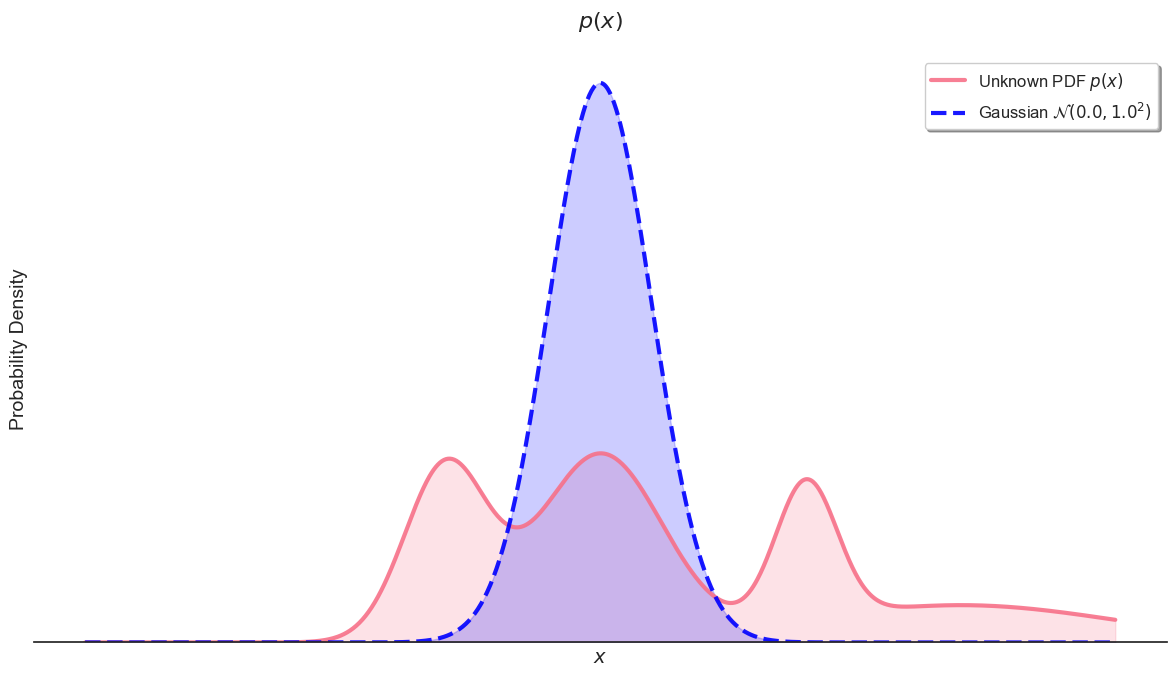

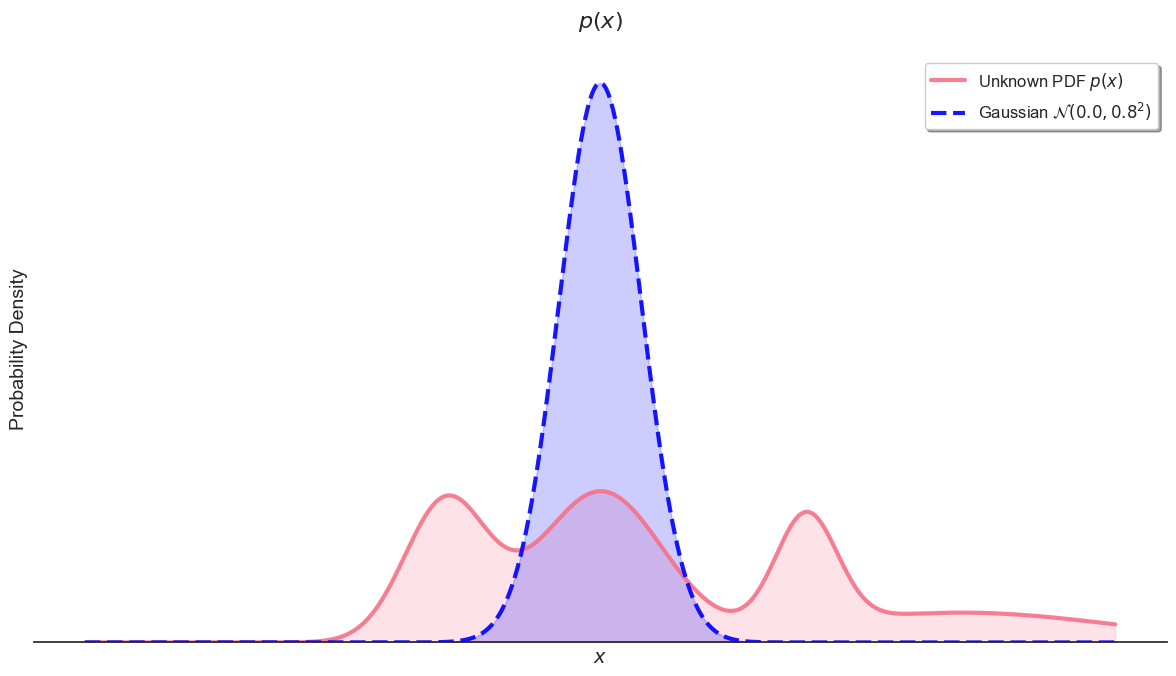

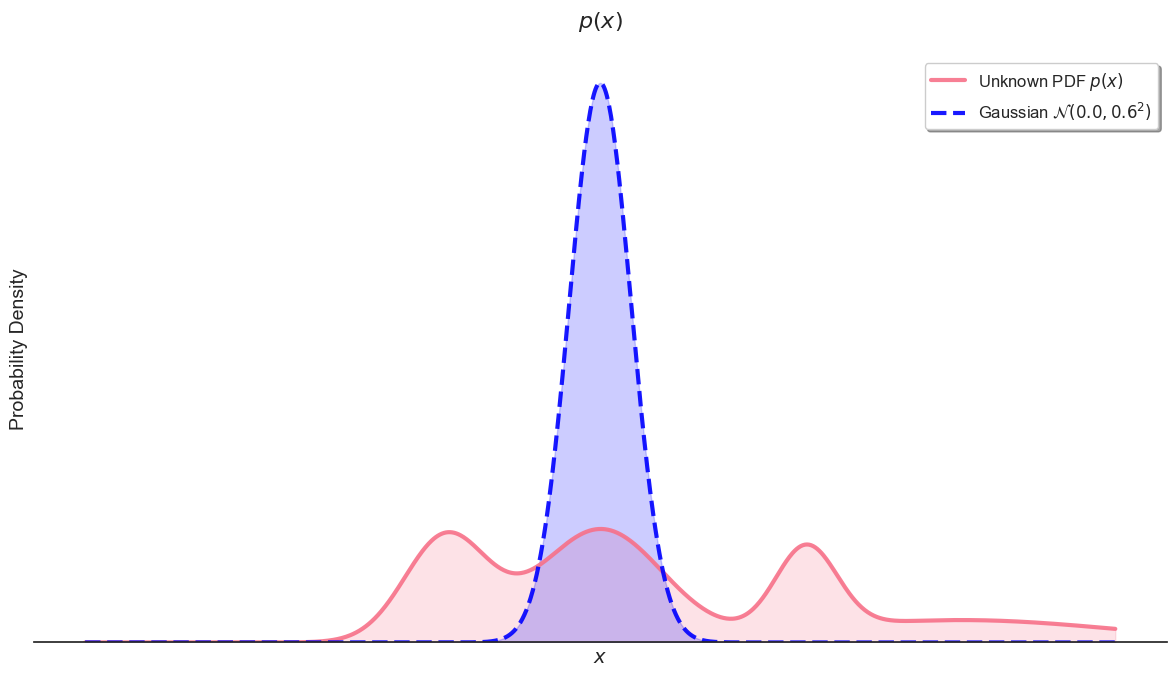

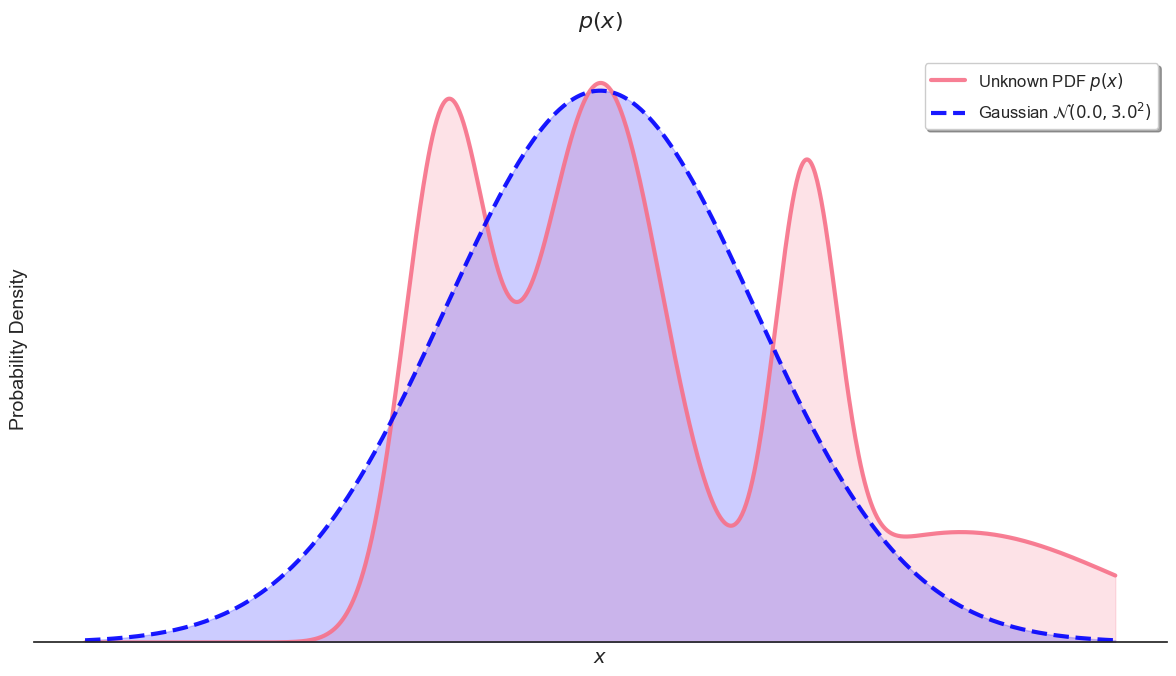

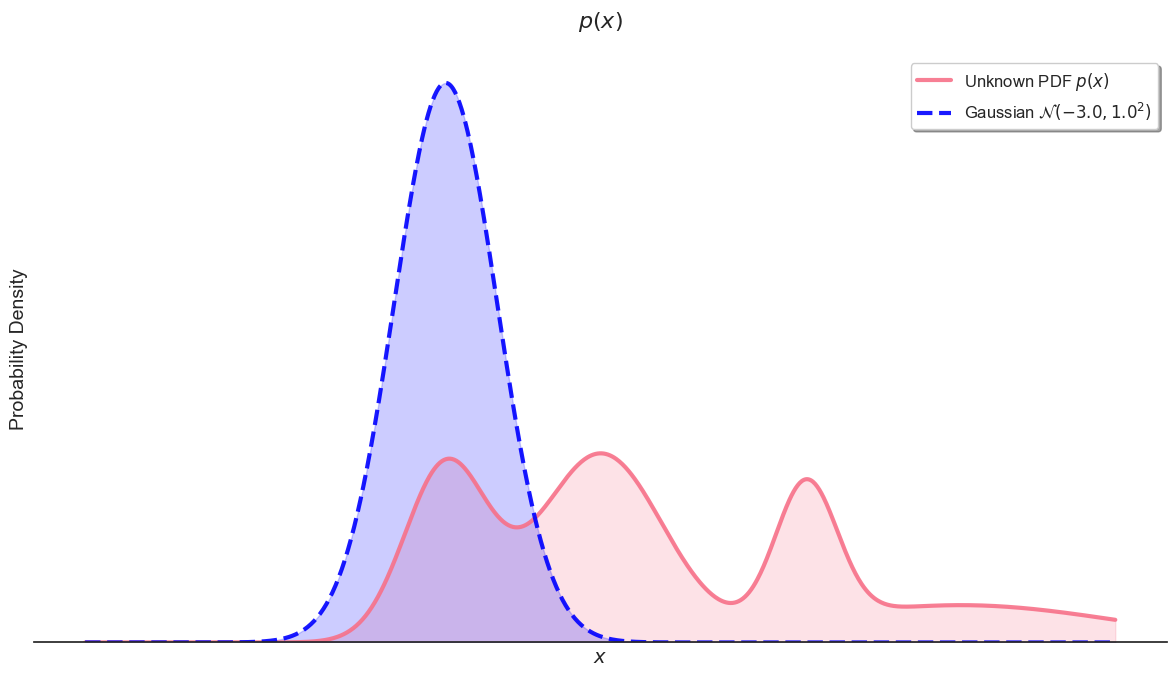

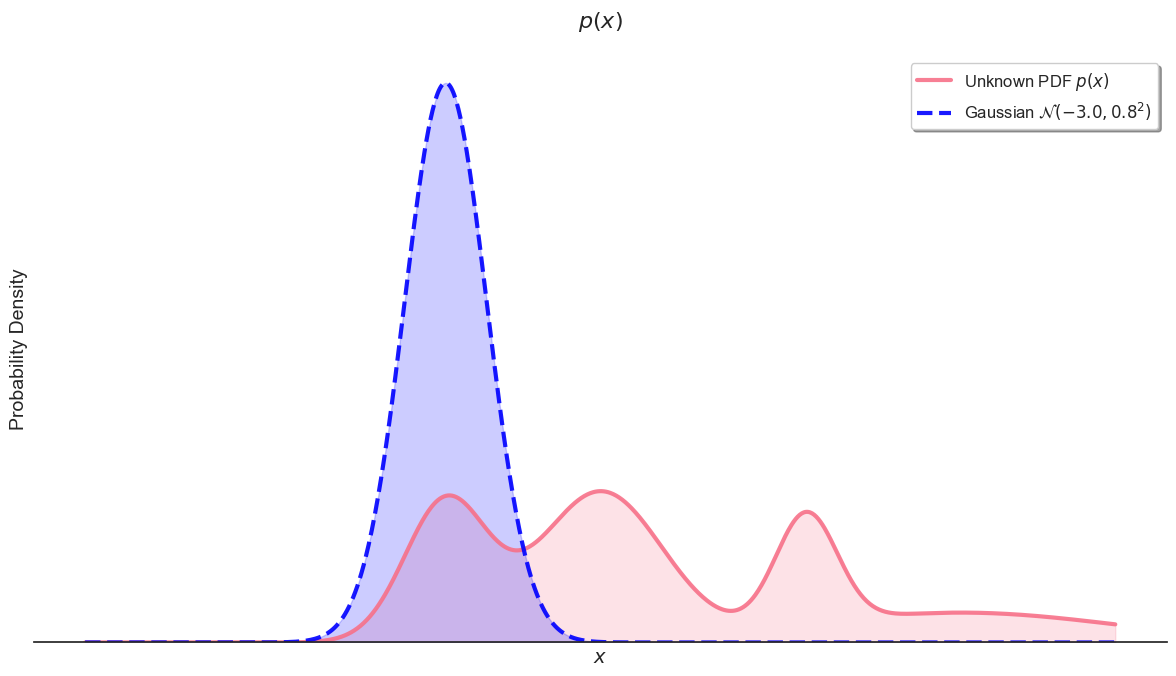

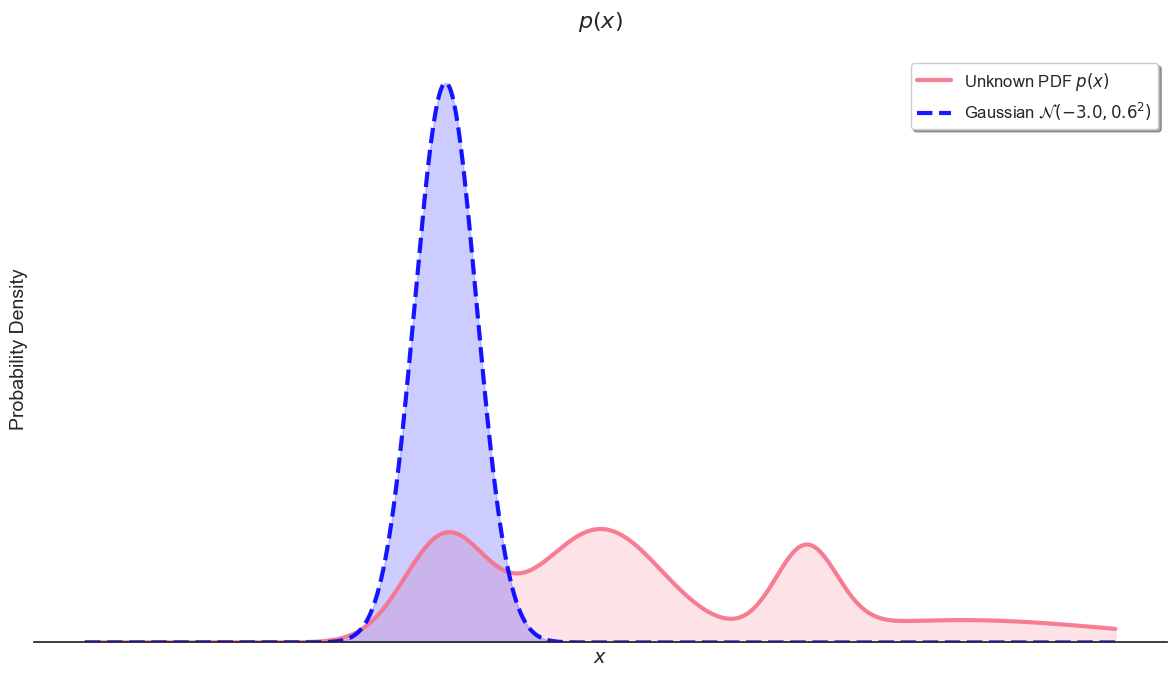

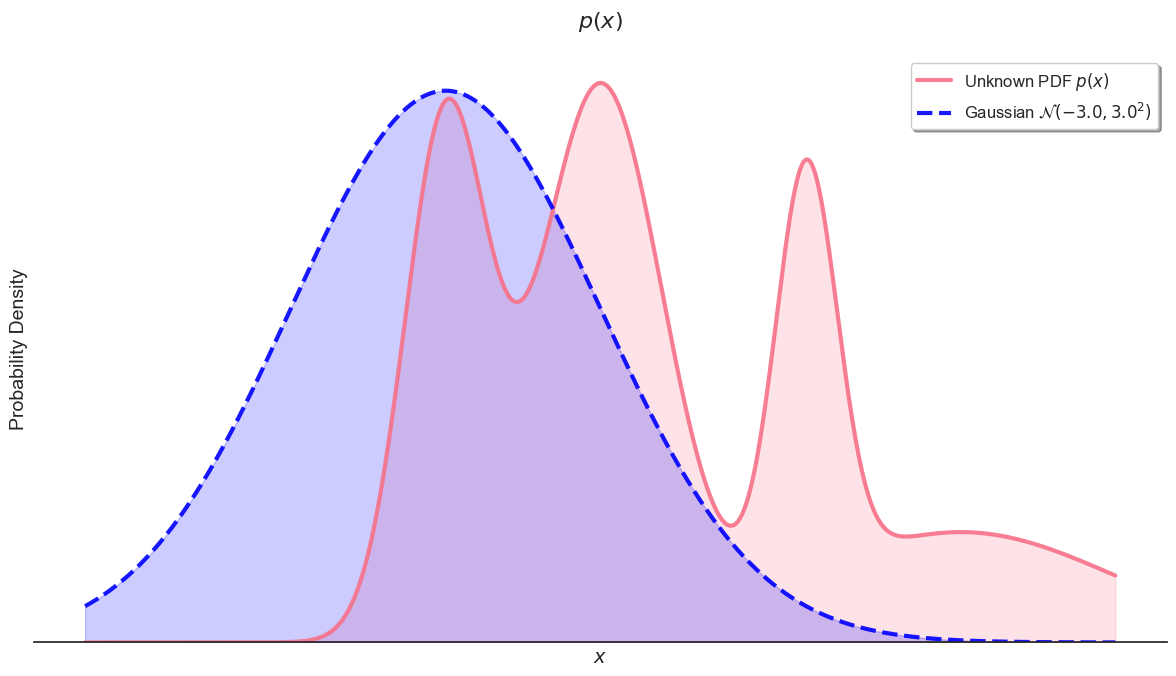

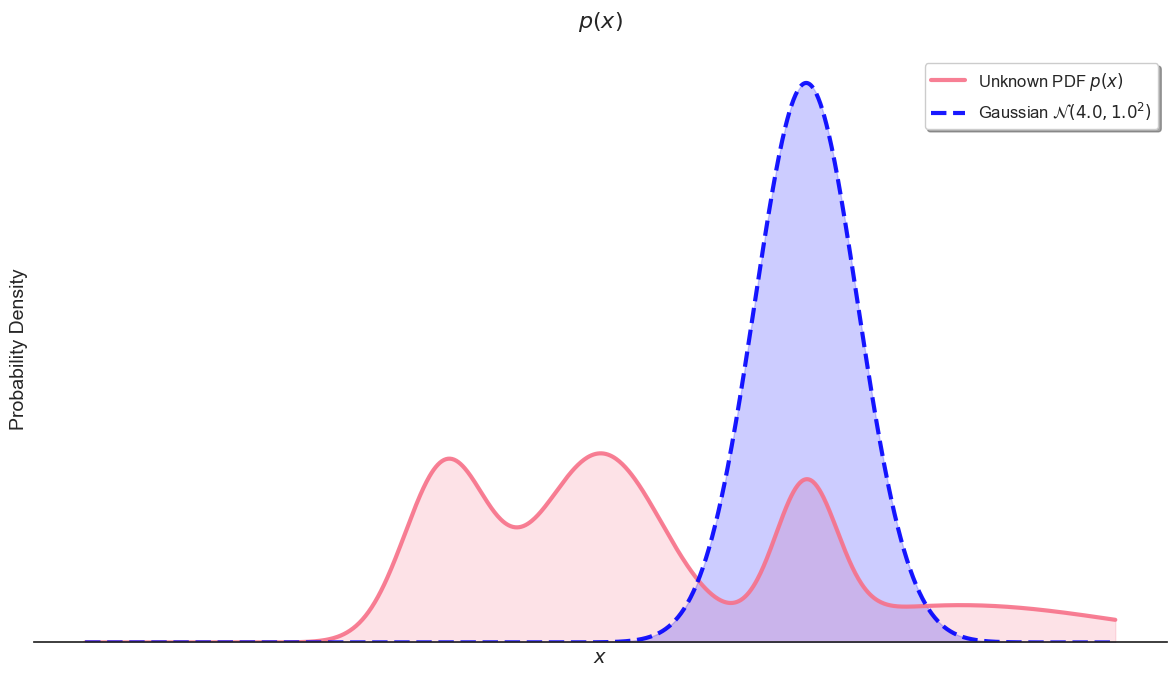

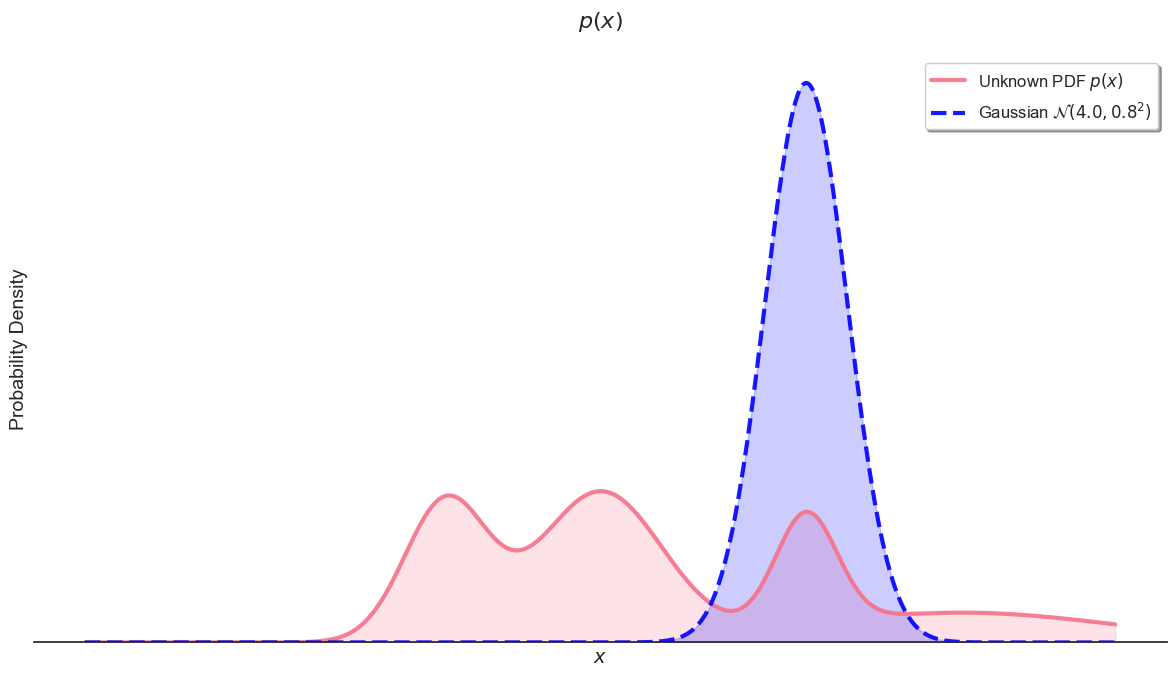

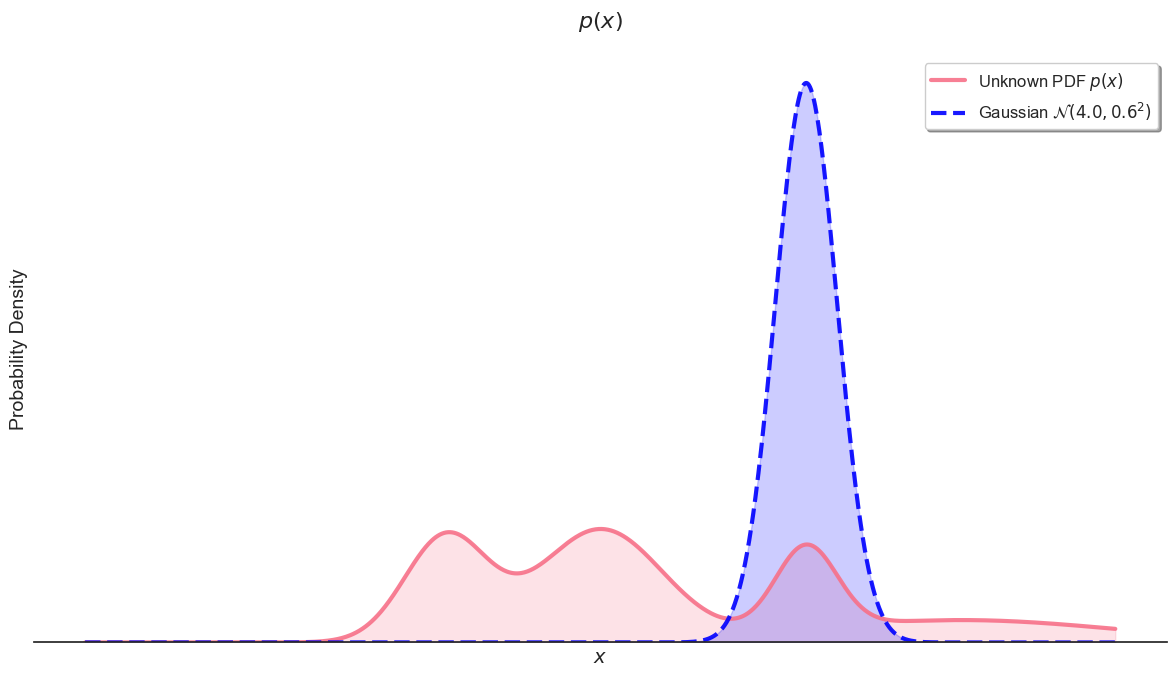

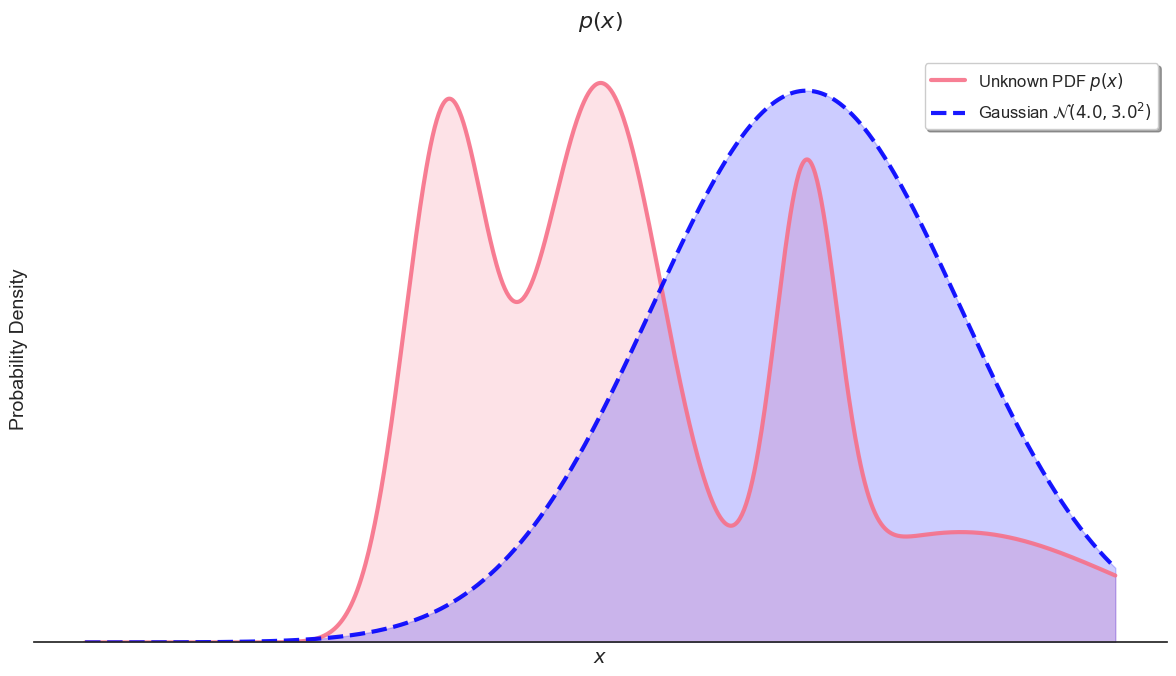

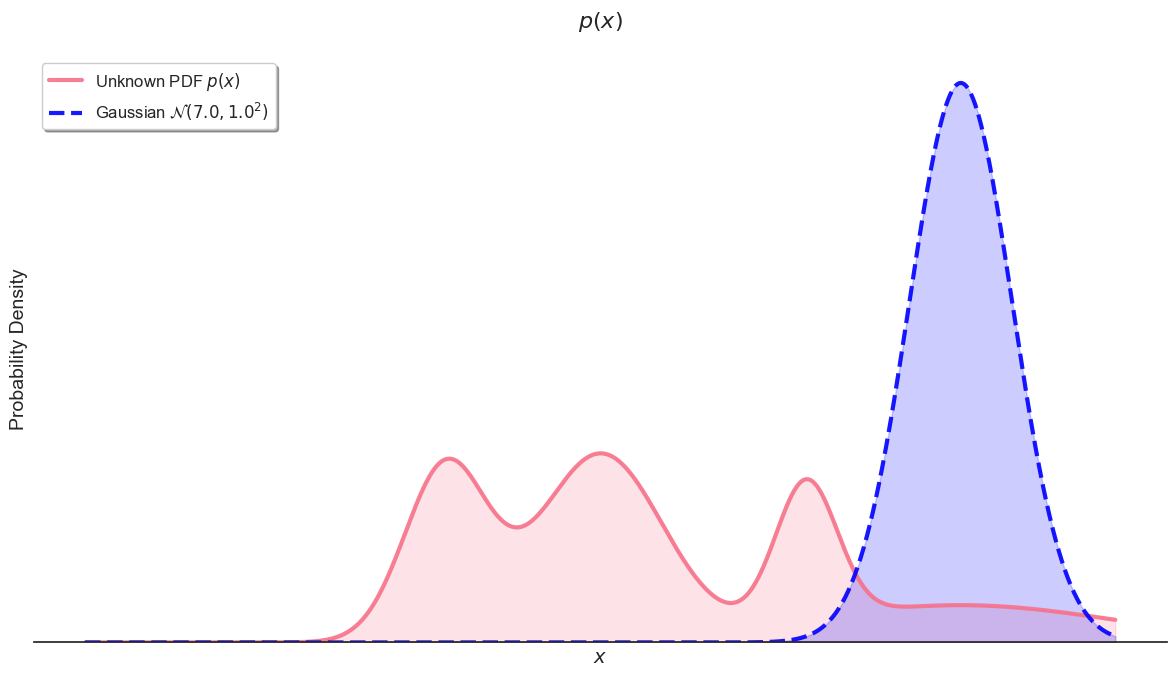

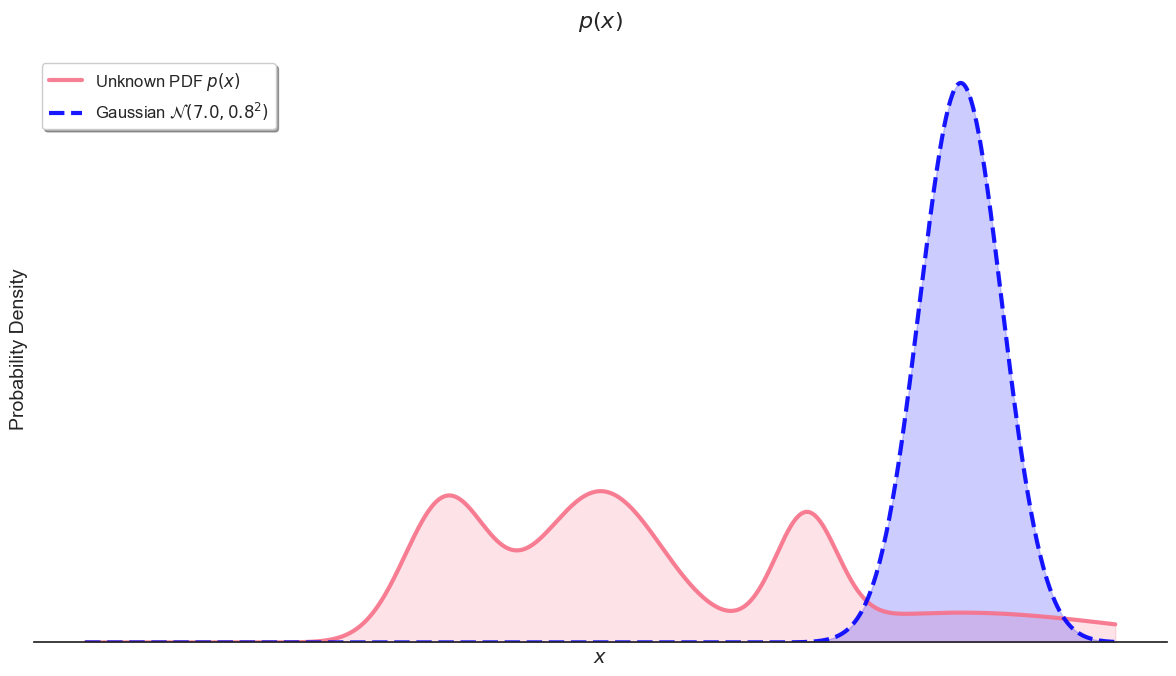

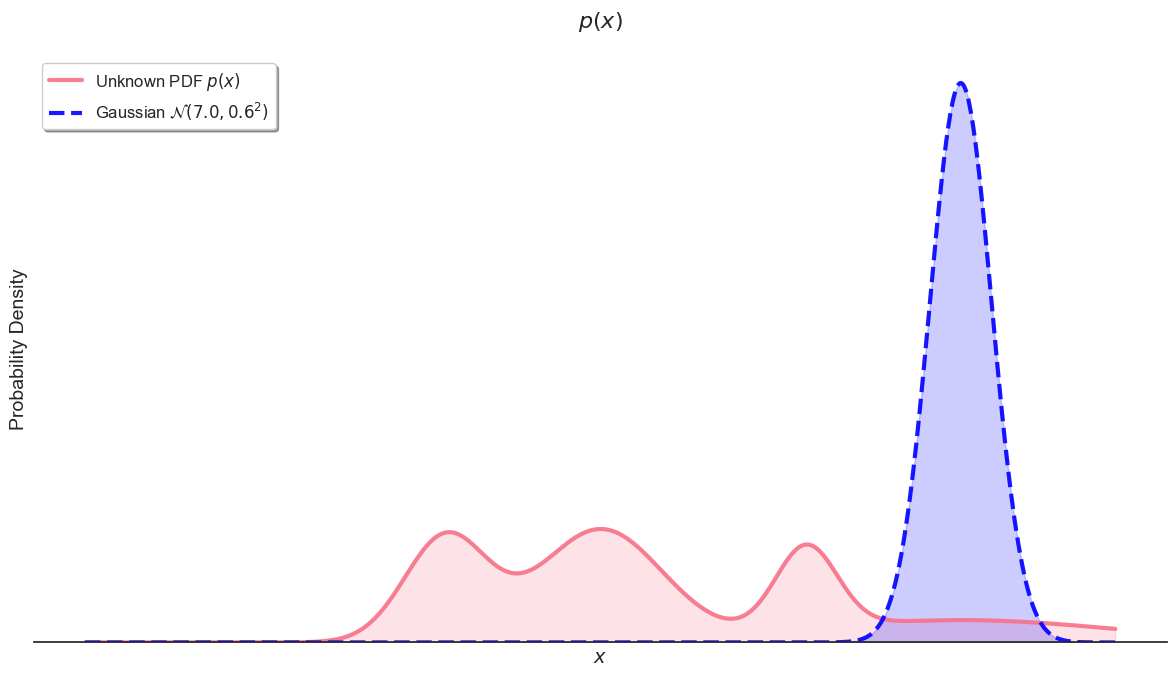

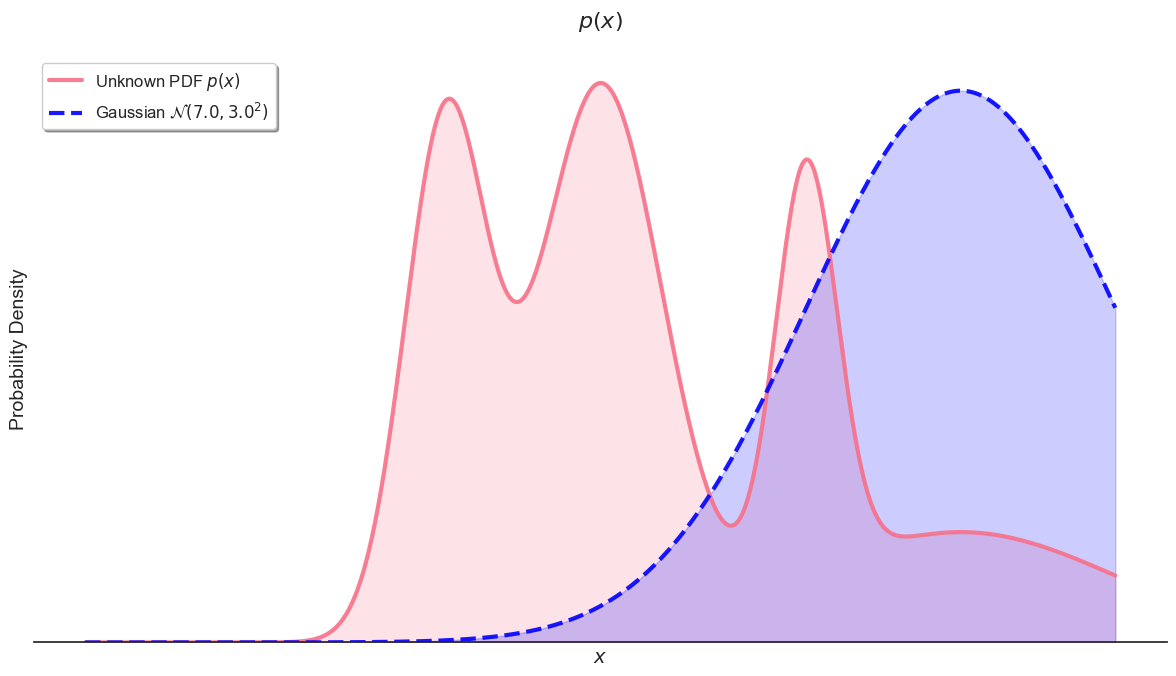

In [26]:
# Create a mixture of Gaussians distribution
np.random.seed(42)

# Define mixture parameters
means = [-3, 0, 4, 7]
stds = [0.8, 1.2, 0.6, 3.0]
weights = [0.25, 0.4, 0.15, 0.2]

# gaussian approximation
approx_mean = [0.0, -3.0, 4.0, 7.0]
approx_std = [1.0, 0.8, 0.6, 3.0]

# Set seaborn style for professional appearance
sns.set_style("white")
sns.set_context("notebook", font_scale=1.2)

# Loop through each approximation mean and std
for a_mean in approx_mean:
    for a_std in approx_std:
        # Create the plot with seaborn styling
        fig, ax = plt.subplots(figsize=(12, 7))

        # Plot the theoretical PDF (probability distribution)
        x = np.linspace(-10, 10, 1000)
        pdf = sum(w * (1 / (std * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mean) / std) ** 2) 
                for w, mean, std in zip(weights, means, stds))

        # Use a sophisticated color palette
        color = sns.color_palette("husl", 1)[0]
        ax.plot(x, pdf, linewidth=3, label='Unknown PDF $p(x)$', color=color, alpha=0.9)
        ax.fill_between(x, pdf, alpha=0.2, color=color)

        # Plot the approximation Gaussian distribution
        approx_gaussian = (1 / (a_std * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - a_mean) / a_std) ** 2)
        ax.plot(x, approx_gaussian, linewidth=3, label=f'Gaussian $\\mathcal{{N}}({a_mean},{a_std}^2)$', color='blue', alpha=0.9, linestyle='--')
        ax.fill_between(x, approx_gaussian, alpha=0.2, color='blue')

        ax.set_xlabel('$x$', fontsize=14, fontweight='medium')
        ax.set_ylabel('Probability Density', fontsize=14, fontweight='medium')
        ax.set_title(r'$p(x)$', fontsize=16, fontweight='bold', pad=20)
        ax.legend(frameon=True, shadow=True, fontsize=12)
        ax.grid(False)
        ax.set_xticks([])
        ax.set_yticks([])

        # Remove top and right spines for cleaner look
        sns.despine()

        # Remove the y-axis and set y-axis limits to start at 0 to remove gap
        ax.spines['left'].set_visible(False)
        ax.set_ylim(bottom=0)

        plt.tight_layout()
        plt.savefig(f'p_x_approx_mean_{a_mean}_approx_std_{a_std}.png', dpi=300, bbox_inches='tight')
        plt.show()


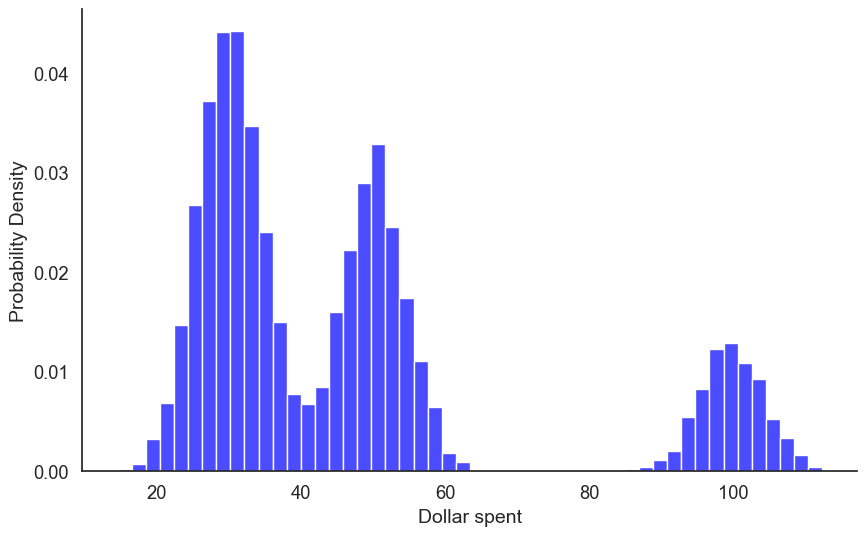

In [ ]:
# Create a mixture of Gaussians with 3 components
means = [30, 50, 100]
stds = [np.sqrt(20), np.sqrt(20), np.sqrt(20)]
weights = [0.5, 0.35, 0.15]

# Sample from the mixture of Gaussians
n_samples = 10000
component_samples = np.random.choice(len(means), size=n_samples, p=weights)
samples = np.array([np.random.normal(means[i], stds[i]) for i in component_samples])

# Set seaborn style for professional appearance
sns.set_style("white")
sns.set_context("notebook", font_scale=1.2)

# Plot the samples
fig, ax = plt.subplots(figsize=(10, 6))
sns.histplot(samples, bins=50, stat='density', alpha=0.7, color='blue', kde=False, ax=ax)
ax.set_xlabel('Dollar spent', fontsize=14, fontweight='medium')
ax.set_ylabel('Probability Density', fontsize=14, fontweight='medium')
sns.despine()
plt.tight_layout()
plt.savefig('mixture_illustration.png', dpi=300, bbox_inches='tight')
plt.show()

